# Data Quality Analysis
This notebook is created to found issues about data quality in 'Transactions','CustomerDemographic','NewCustomerList' and 'CustomerAdress' datasets given by Sprocket Central Pty Ltd Data Set

In [274]:
#Importing libraries
#-------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
print("setup complete!")

setup complete!


In [275]:
#Opening the File.xlsx
#-------------------------------

file_path = "KPMG_VI_New_raw_data_update_final.xlsx"

In [276]:
#Function to open the sheets as dataframes
#-------------------------------

def analysing_data(file_path, sheet, col):
    data = pd.read_excel(file_path, sheet_name=sheet, index_col=0, skiprows=1, usecols=col)
    return data

In [277]:
#Sheet_1 - Transactions
sheet_1 = analysing_data(file_path,'Transactions','A:M')

#Sheet_2 - CustomerDemographic
sheet_2 = analysing_data(file_path,'CustomerDemographic','A:M')

#Sheet_3 - NewCustomersList
sheet_3 = analysing_data(file_path,'NewCustomerList','A:W')

#Sheet_4 - CustomerAdress
sheet_4 = analysing_data(file_path,'CustomerAddress','A:F')

In [ ]:
#Sheet_1 - Transactions
sheet_1.info()

In [ ]:
#Sheet_2 - CustomerDemographic
sheet_2.info()

In [ ]:
#Sheet_3 - NewCustomersList
sheet_3.info()

In [ ]:
#Sheet_4 - CustomerAdress
sheet_4.info()

In [278]:
#Function to Accuracy
#-------------------------------

def Accuracy(file):
    value = file.columns.to_series().groupby(file.dtypes).groups
    return value

In [279]:
#Sheet_1 - Transactions
print('---------|Sheet(1)-Transactions:')
print(Accuracy(sheet_1))
print('\n')

#Sheet_2 - CustomerDemographic
print('---------|Sheet(2)-CustomerDemographic:')
print(Accuracy(sheet_2))
print('\n')

#Sheet_3 - NewCustomersList
print('---------|Sheet(3)-NewCustomerList:')
print(Accuracy(sheet_3))
print('\n')

#Sheet_4 - CustomerAdress
print('---------|Sheet(4)-CustomerAdress:')
print(Accuracy(sheet_4))
print('\n')

---------|Sheet(1)-Transactions:
{int64: ['product_id', 'customer_id'], datetime64[ns]: ['transaction_date'], float64: ['online_order', 'list_price', 'standard_cost', 'product_first_sold_date'], object: ['order_status', 'brand', 'product_line', 'product_class', 'product_size']}


---------|Sheet(2)-CustomerDemographic:
{int64: ['past_3_years_bike_related_purchases'], datetime64[ns]: ['DOB'], float64: ['tenure'], object: ['first_name', 'last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car']}


---------|Sheet(3)-NewCustomerList:
{int64: ['past_3_years_bike_related_purchases', 'tenure', 'postcode', 'property_valuation', 'Unnamed: 20', 'Rank'], datetime64[ns]: ['DOB'], float64: ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Value'], object: ['last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'address', 'state', 'country']}


---------|Sheet(4)-Cu

In [280]:
#Function to Completeness
#-------------------------------
def Completeness (file):
    
    missing_values_count = file.isnull().sum()
    total_cells = np.product(file.shape)
    total_missing = missing_values_count.sum()

    #percent of data missed
    percent = (total_missing / total_cells) * 100
    complete = (total_cells - total_missing)
    print(f'Data Empty:', round(percent,2))
    print(f'Data Complete:', round(complete, 2))

    #Creating a dataframe to stackedbar
    data = pd.DataFrame({'Total_Row': file.count(axis=0), 'Missing': file.isnull().sum()})

    # create stacked bar chart for monthly temperatures
    data.plot.bar(stacked=True, figsize=(12,6))
    plt.ylabel('Number of Records')
    plt.title(f'Total Value Missed per Column')

---------|Sheet(1)-Transactions:
Data Empty: 0.64
Data Complete: 238458
None




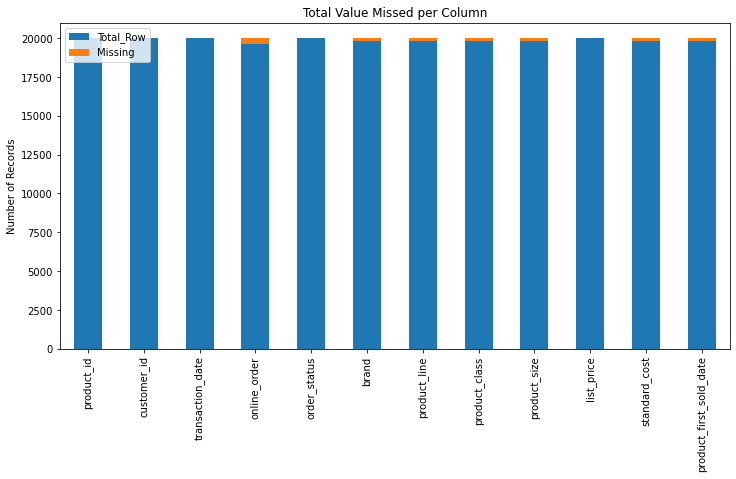

In [281]:
#Sheet_1 - Transactions
print('---------|Sheet(1)-Transactions:')
print(Completeness(sheet_1))
print('\n')
 

In [283]:
sheet_1['online_order']

transaction_id
1        0.0
2        1.0
3        0.0
4        0.0
5        1.0
        ... 
19996    1.0
19997    1.0
19998    1.0
19999    0.0
20000    1.0
Name: online_order, Length: 20000, dtype: float64

In [ ]:
#Sheet_2 - CustomerDemographic
print('---------|Sheet(2)-CustomerDemographic:')
print(Completeness(sheet_2))
print('\n')

In [ ]:
#Sheet_3 - NewCustomersList
print('---------|Sheet(3)-NewCustomerList:')
print(Completeness(sheet_3))
print('\n')

In [ ]:
#Sheet_4 - CustomerAdress
print('---------|Sheet(4)-CustomerAdress:')
print(Completeness(sheet_4))
print('\n')

In [ ]:
#Function to Consistency

def Consistency(file_list):
    
    neo = list()
    dic = dict()
    
    for x in file_list:
        for w in x.columns:
            neo.append(w)
            
    for item in neo:
        dic[item] = dic.get(item,0)+1
                
    return dic

In [ ]:
file_list = [sheet_1, sheet_2, sheet_3, sheet_4]
Consistency(file_list)

In [ ]:
#Comments:
#4 columns without description?
sheet_3.head()

In [ ]:
#Function to Currency - datetime64[ns]

#-------------------------------

def Currency(file, path):
    print("Max date: {}".format(file[path].max()))
    print('------------------')
    print("Min date: {}".format(file[path].min()))
    

In [ ]:
Currency(sheet_1, 'transaction_date')

In [ ]:
Currency(sheet_2, 'DOB')

In [ ]:
sheet_2.query("DOB == '1843-12-21'")

In [ ]:
Currency(sheet_3, 'DOB')

In [240]:
#'product_first_sold_date' with a wrong type data - it should be date not float and cannot transform it...
sheet_1['product_first_sold_date']
pd.to_datetime(sheet_1['product_first_sold_date'][[1]], format='%m%d%y')

transaction_id
1   2045-04-12
Name: product_first_sold_date, dtype: datetime64[ns]

In [251]:
#Validity -> Data containing allowable values

def Validity_id(file):
    for x in file:
        if type(x) != int:
            print(x)
        else:
            pass
    print('All validated!')        


def Validity_gender(file):
    
    dic = dict()
    
    for x in file:
        if x not in dic:
            dic[x] = 1
        else:
            dic[x] = dic[x] + 1
            
    return dic


In [252]:
print('Sheet 1 - Transactions')
print(Validity_id(sheet_1['product_id']))
print('\n')

print('Sheet 1 - Transactions')
print(Validity_id(sheet_1['customer_id']))
print('\n')

Sheet 1 - Transactions
All validated!
None


Sheet 1 - Transactions
All validated!
None




In [253]:
print('Sheet 2 - Customer Demographic')
print(Validity_gender(sheet_2['gender']))
print('\n')

print('Sheet 3 - New Customer List')
print(Validity_gender(sheet_3['gender']))
print('\n')

Sheet 2 - Customer Demographic
{'F': 1, 'Male': 1872, 'Female': 2037, 'U': 88, 'Femal': 1, 'M': 1}


Sheet 3 - New Customer List
{'Male': 470, 'Female': 513, 'U': 17}




In [254]:
print('Sheet 4 - Customer Address')
print(Validity_gender(sheet_4['state']))
print('\n')

Sheet 4 - Customer Address
{'New South Wales': 86, 'QLD': 838, 'VIC': 939, 'NSW': 2054, 'Victoria': 82}




In [273]:
#Relevancy -> Data Items with Value Meta-Data
sheet_2['default'].head()

customer_id
1                                                   "'
2                         <script>alert('hi')</script>
3                                  2018-02-01 00:00:00
4    () { _; } >_[$($())] { touch /tmp/blns.shellsh...
5                                                  NIL
Name: default, dtype: object

In [268]:
#Uniqueness -> Values that are duplicated
def Unique(file):
    return file[file.duplicated()]

In [270]:
Unique(sheet_1)

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,


In [284]:
sheet_3['Rank']

first_name
Chickie         1
Morly           1
Ardelis         1
Lucine          4
Melinda         4
             ... 
Ferdinand     996
Burk          997
Melloney      997
Dickie        997
Sylas        1000
Name: Rank, Length: 1000, dtype: int64